# Limpeza de dados e estatística descritiva

Neste desafio, iremos revisar alguns conceitos vistos nas aulas e ver algumas novidades. Os dados originais são do [repositório de dados eleitorais do Tribunal Superior Eleitoral](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1). 

O CSV disponibilizado é formado pela conjunção de algumas tabelas do arquivo [orgao_partidario.zip](https://cdn.tse.jus.br/estatistica/sead/odsele/orgao_partidario/orgao_partidario.zip), localizado no menu Partidos > Órgão Partidário.

Preencha as lacunas abaixo para completar o desafio.

# Importe os pacotes necessários

In [1]:
import pandas as pd
import numpy as np

# Leia o arquivo "receitas_orgaos_partidarios_2020_NORDESTE.csv" usando o Pandas

Na aula `1.10 - Outliers e valores faltantes`, vimos como utilizar o método `replace` para substituir valores em certos colunas do nosso dataframe e trocar o texto (string) `#NULO#` pela representação padrão do Pandas para valores nulos.

Aqui, vamos utilizar um outro método, onde definimos quais strings serão considerados valores nulos já na importação do arquivo.

Edite as células abaixo e inclua:

* O nome do arquivo que queremos importar
* O separador utilizado
* Insira uma lista no parâmetro `na_values` que contenha o texto a ser ignorado.

Experimente rodar os comandos primeiro sem e depois com o parâmetro `na_values`, então, compare a diferença. Observe, por exemplo, o campo `CD_CNAE_DOADOR`.

In [2]:
df = pd.read_csv('receitas_orgaos_partidarios_2020_NORDESTE.csv',sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 0 to 12873
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DT_GERACAO                   12874 non-null  object
 1   HH_GERACAO                   12874 non-null  object
 2   ANO_ELEICAO                  12874 non-null  int64 
 3   CD_TIPO_ELEICAO              12874 non-null  int64 
 4   NM_TIPO_ELEICAO              12874 non-null  object
 5   TP_PRESTACAO_CONTAS          12874 non-null  object
 6   DT_PRESTACAO_CONTAS          12874 non-null  object
 7   SQ_PRESTADOR_CONTAS          12874 non-null  int64 
 8   CD_ESFERA_PARTIDARIA         12874 non-null  object
 9   DS_ESFERA_PARTIDARIA         12874 non-null  object
 10  SG_UF                        12874 non-null  object
 11  CD_MUNICIPIO                 12874 non-null  int64 
 12  NM_MUNICIPIO                 12874 non-null  object
 13  NR_CNPJ_PRESTADOR_CONTA      12

In [3]:
df = pd.read_csv('receitas_orgaos_partidarios_2020_NORDESTE.csv',sep=';', na_values='#NULO#')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 0 to 12873
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DT_GERACAO                   12874 non-null  object
 1   HH_GERACAO                   12874 non-null  object
 2   ANO_ELEICAO                  12874 non-null  int64 
 3   CD_TIPO_ELEICAO              12874 non-null  int64 
 4   NM_TIPO_ELEICAO              12874 non-null  object
 5   TP_PRESTACAO_CONTAS          12874 non-null  object
 6   DT_PRESTACAO_CONTAS          12874 non-null  object
 7   SQ_PRESTADOR_CONTAS          12874 non-null  int64 
 8   CD_ESFERA_PARTIDARIA         12874 non-null  object
 9   DS_ESFERA_PARTIDARIA         12874 non-null  object
 10  SG_UF                        12874 non-null  object
 11  CD_MUNICIPIO                 12874 non-null  int64 
 12  NM_MUNICIPIO                 11606 non-null  object
 13  NR_CNPJ_PRESTADOR_CONTA      12

# Filtre apenas os registros que sejam da prestação de contas final


In [4]:
# Primeiro vamos ver os valores únicos da coluna TP_PRESTACAO_CONTAS

df['TP_PRESTACAO_CONTAS'].unique()

array(['Final', 'Relatório Financeiro', 'Parcial',
       'Regularização da Omissão'], dtype=object)

In [5]:
# O resultado deste comando nos diz que quantas linhas e colunas temos antes do filtro
df.shape

(12874, 48)

In [10]:
# Preencha o campo os espaços abaixo com o nome da coluna e o valor desejado para nosso filtro
df_final = df[df['TP_PRESTACAO_CONTAS'] == 'Final'].copy()

In [11]:
# Rode o comando shape no novo dataframe criado e confira se o número de linhas foi reduzido

df_final.shape

(12288, 48)

In [13]:
df_final.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,...,NaN,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,...,NaN,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,NaN,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,...,NaN,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000


## Qual foi a maior doação de pessoa física e pessoa jurídica em cada estado?

Vamos usar o método `value_counts` para não só listar cada valor único da coluna `CD_CNAE_DOADOR`, como também mostrar quantos registros temos em cada um.

In [14]:
# Preencha o nome da coluna abaixo
df_final['CD_CNAE_DOADOR'].value_counts()

-1        6509
 94928    5735
 94308      37
 14126       3
 62023       1
 17311       1
 84116       1
 94995       1
Name: CD_CNAE_DOADOR, dtype: int64

In [15]:
df_final['DS_CNAE_DOADOR'].unique()

array([nan, 'Atividades de organizações políticas',
       'Atividades de associações de defesa de direitos sociais',
       'Desenvolvimento e licenciamento de programas de computador customizáveis',
       'Fabricação de embalagens de papel',
       'Administração pública em geral',
       'Atividades associativas não especificadas anteriormente',
       'Confecção de peças do vestuárioxceto roupas íntimas'],
      dtype=object)

In [16]:
# Para ver os resultados em percentuais é fácil! Basta falarmos para o value_counts que queremos os resultados normalizados
df_final['CD_CNAE_DOADOR'].value_counts(normalize=True)

-1        0.529704
 94928    0.466715
 94308    0.003011
 14126    0.000244
 62023    0.000081
 17311    0.000081
 84116    0.000081
 94995    0.000081
Name: CD_CNAE_DOADOR, dtype: float64

Se o doador for pessoa jurídica, temos seu respectivo código CNAE. Se for pessoa física, então temos o valor `-1`. 

Qual conclusão podemos tirar a respeito dos comandos acima?

Escreva um **comentário** na célula abaixo com a resposta.

In [11]:
# Mais da metade dos registros são de pessoas físicas.

Agora, vamos duplicar a coluna `CD_CNAE_DOADOR` e deixar esta nova coluna apenas com 2 categorias: física (representada pelo valor -1) ou jurídica (que vamos representar inicialmente com 1).

In [19]:
# Vamos criar uma nova coluna que seja uma cópia exata da coluna CD_CNAE_DOADOR
df_final['TIPO_DOADOR'] = df_final.loc[:, 'CD_CNAE_DOADOR']


In [20]:
df_final.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADOR
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,...,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500,-1
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,...,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500,-1
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2,94928
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000,94928
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000,94928


## Substituição condicional (conditional replacing)

Agora, vamos usar o método where do pacote NumPy (carinhosamente chamado de np abaixo).

Esta função recebe três parâmetros:

* Uma condição: no nosso caso, queremos que filtrar as coluna do CNAE onde os valores sejam -1
* Um valor: caso a condição acima seja verdadeira, qual valor deverá ser retornado?
* Outro valor: se a condição for falsa, então, qual outro valor deverá ser retornado?


In [21]:
df_final['TIPO_DOADOR'] = np.where(df_final['TIPO_DOADOR']== -1, 'fisica', 'juridica')

In [22]:
df_final.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,CD_ESFERA_PARTIDARIA,DS_ESFERA_PARTIDARIA,...,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA,TIPO_DOADOR
0,22/07/2021,23:25:00,2020,2,Ordinária,Final,14/12/2020,1220401248,M,Municipal,...,-1,NaN,NaN,P15000411452PI000005A,NaN,18729827,29/09/2020,LOC. DE IMOVEL P/ FUNCION. DE COMITE ELEITORAL...,1500,fisica
1,22/07/2021,23:25:00,2020,2,Ordinária,Final,08/03/2021,1364490302,M,Municipal,...,-1,NaN,NaN,P15000412165PI000002A,NaN,19789208,27/09/2020,CESSÃO DE SERVIÇOS DE ASSESSORIA E CONSULTORIA...,1500,fisica
2,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000004A,001,19413470,08/12/2020,NaN,2,juridica
3,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405469,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P17000412661PI000001A,850020,19413467,21/10/2020,NaN,14000,juridica
4,22/07/2021,23:25:00,2020,2,Ordinária,Final,15/12/2020,1220405081,M,Municipal,...,40,PSB,Partido Socialista Brasileiro,P40000412564PI000001A,850007,19352758,09/10/2020,NaN,28000,juridica


## Agrupando (group by)

In [23]:
# Preencha abaixo primeiro uma lista com as 3 colunas que precisamos utilizar para responder à pergunta. E depois o nome das 2 colunas que precisamos agrupar.

df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).max()

VR_RECEITA
TIPO_DOADOR SG_UF            
fisica      AL          17665
            BA         200000
            CE         200000
            MA         100000
            PB          23000
            PE         150000
            PI          23708
            RN          25000
            SE          31000
juridica    AL        3900000
            BA       11900000
            CE        3900000
            MA        3900000
            PB        2169395
            PE        4998000
            PI        3900000
            RN        3900000
            SE        4000000

In [24]:
# Para repetir o valor da coluna TIPO_DOADOR nas linhas, coloque o parâmetro as_index=False no método groupby do comando acima

df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF'],as_index=False).max()

,TIPO_DOADOR,SG_UF,VR_RECEITA
0,fisica,AL,17665
1,fisica,BA,200000
2,fisica,CE,200000
3,fisica,MA,100000
4,fisica,PB,23000
5,fisica,PE,150000
6,fisica,PI,23708
7,fisica,RN,25000
8,fisica,SE,31000
9,juridica,AL,3900000


## Qual o total de doações recebidas por partido?

In [31]:
total_doacoes = df_final[['SG_PARTIDO','NM_PARTIDO','VR_RECEITA']].groupby(by=['SG_PARTIDO','NM_PARTIDO']).sum()
total_doacoes

,,VR_RECEITA
SG_PARTIDO,NM_PARTIDO,
AVANTE,AVANTE,1555473
CIDADANIA,Cidadania,5433420
DC,Democracia Cristã,1415608
DEM,Democratas,2521140
MDB,Movimento Democrático Brasileiro,39185338
NOVO,Partido Novo,138588
PATRIOTA,Patriota,946022
PC do B,Partido Comunista do Brasil,2393497
PCB,Partido Comunista Brasileiro,146072


## Qual é o top 10?

Crie um novo dataframe com os 10 partidos com mais doações. Você precisa primeiro ordenar os resultados e depois selecionar apenas os 10 primeiros.



In [32]:
total_doacoes_decrescente = total_doacoes.sort_values(by='VR_RECEITA',ascending=False)
total_doacoes_decrescente

,,VR_RECEITA
SG_PARTIDO,NM_PARTIDO,
PSD,Partido Social Democrático,55485632
PP,PROGRESSISTAS,50241447
PT,Partido dos Trabalhadores,43423701
MDB,Movimento Democrático Brasileiro,39185338
PSB,Partido Socialista Brasileiro,38124175
PSL,Partido Social Liberal,32500228
PODE,Podemos,15425546
PTB,Partido Trabalhista Brasileiro,13536876
PDT,Partido Democrático Trabalhista,13420365


In [34]:
top_10 = total_doacoes_decrescente.head(10)
top_10

,,VR_RECEITA
SG_PARTIDO,NM_PARTIDO,
PSD,Partido Social Democrático,55485632
PP,PROGRESSISTAS,50241447
PT,Partido dos Trabalhadores,43423701
MDB,Movimento Democrático Brasileiro,39185338
PSB,Partido Socialista Brasileiro,38124175
PSL,Partido Social Liberal,32500228
PODE,Podemos,15425546
PTB,Partido Trabalhista Brasileiro,13536876
PDT,Partido Democrático Trabalhista,13420365


# Vamos visualizar os resultados?
Na aula, nós vimos como usar o matplotlib para gerar gráficos. Agora, vamos descobrir uma nova forma de fazer o mesmo usando um método nativo Pandas. Experimente colocar `.plot(kind='barh')` após a consulta ou dataframe anterior.

Com este comando, podemos produzir um gráfico (plot) do tipo (kind) de barras horizontais (barh).

<AxesSubplot:ylabel='SG_PARTIDO,NM_PARTIDO'>

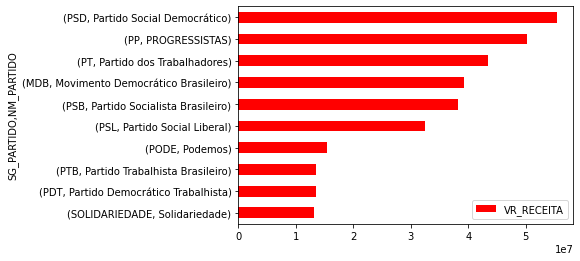

In [44]:
top_10.sort_values(by='VR_RECEITA').plot(kind='barh', color={'red'})

In [36]:
ultimos_10 = total_doacoes_decrescente.tail(10)
ultimos_10

,,VR_RECEITA
SG_PARTIDO,NM_PARTIDO,
PTC,Partido Trabalhista Cristão,1307068
PATRIOTA,Patriota,946022
PSC,Partido Social Cristão,294951
UP,Unidade Popular,281887
PCB,Partido Comunista Brasileiro,146072
NOVO,Partido Novo,138588
PRTB,Partido Renovador Trabalhista Brasileiro,94798
PMN,Partido da Mobilização Nacional,93731
PMB,Partido da Mulher Brasileira,65117


<AxesSubplot:ylabel='SG_PARTIDO,NM_PARTIDO'>

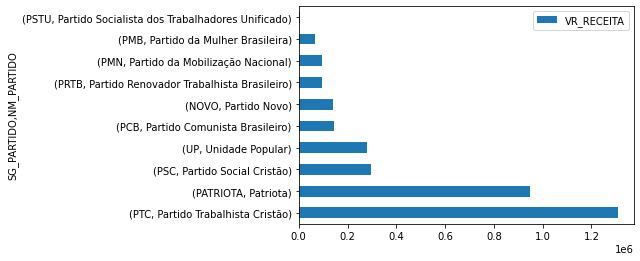

In [37]:
ultimos_10.plot(kind='barh')

## Qual o valor médio das doações por tipo de doador?

Agora é sua vez! A partir dos comandos anteriores, faça uma nova consulta para descobrir a mediana de acordo com o tipo de doador.

In [55]:
df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).mean()

VR_RECEITA
TIPO_DOADOR SG_UF               
fisica      AL        653.868035
            BA       1962.934749
            CE       2127.782723
            MA       2542.015365
            PB        817.424870
            PE       2687.897753
            PI       1200.901786
            RN       1244.894526
            SE       1888.990654
juridica    AL     121419.702128
            BA      40453.708991
            CE      66957.925706
            MA      65374.247379
            PB      71048.879845
            PE      94264.599217
            PI      78605.486711
            RN      48464.931313
            SE      53392.889423

In [64]:
df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF'],as_index=False).max()


,TIPO_DOADOR,SG_UF,VR_RECEITA
0,fisica,AL,17665
1,fisica,BA,200000
2,fisica,CE,200000
3,fisica,MA,100000
4,fisica,PB,23000
5,fisica,PE,150000
6,fisica,PI,23708
7,fisica,RN,25000
8,fisica,SE,31000
9,juridica,AL,3900000


In [66]:
df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).agg({'VR_RECEITA': ['min', 'median', 'max']}) 

VR_RECEITA                   
                         min   median       max
TIPO_DOADOR SG_UF                              
fisica      AL             0    100.0     17665
            BA             0   1000.0    200000
            CE             0    500.0    200000
            MA             0   1000.0    100000
            PB             1    430.5     23000
            PE             0    600.0    150000
            PI             0    885.0     23708
            RN             0    250.0     25000
            SE             4   1000.0     31000
juridica    AL             0  15000.0   3900000
            BA             0    520.0  11900000
            CE             0    375.0   3900000
            MA             0   1000.0   3900000
            PB             0   1000.0   2169395
            PE             0   3500.0   4998000
            PI             0  10000.0   3900000
            RN             0    400.0   3900000
            SE             0   1900.0   4000000

In [53]:
round(df_final[['TIPO_DOADOR','SG_UF','VR_RECEITA']].groupby(by=['TIPO_DOADOR','SG_UF']).max(), 1)

VR_RECEITA
TIPO_DOADOR SG_UF            
fisica      AL          17665
            BA         200000
            CE         200000
            MA         100000
            PB          23000
            PE         150000
            PI          23708
            RN          25000
            SE          31000
juridica    AL        3900000
            BA       11900000
            CE        3900000
            MA        3900000
            PB        2169395
            PE        4998000
            PI        3900000
            RN        3900000
            SE        4000000

# Entreviste você mesmo

Escreva abaixo pelo menos outras três perguntas que podem ser feitas à base de dados. Escreva a pergunta como um comentário acima do código com a consulta em Python.